In [1]:
import scipy as sp 
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('bmh')

# Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

In [4]:
res = minimize(f, 1)

In [5]:
res

      fun: 3.2397920662551844e-16
 hess_inv: array([[0.5]])
      jac: array([-2.10976836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

In [6]:
res.x

array([2.99999998])

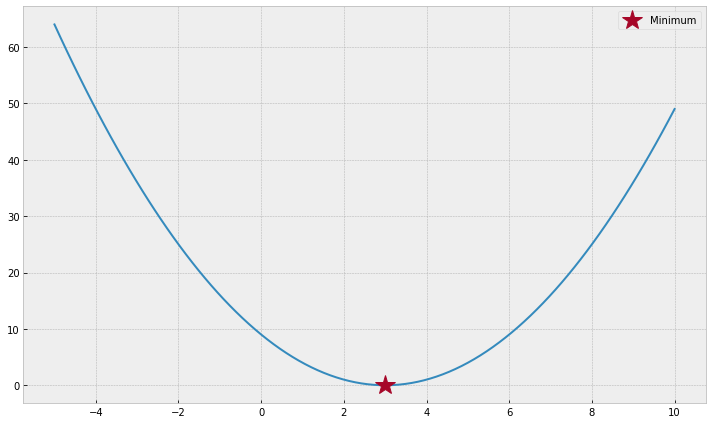

In [7]:
xs = np.linspace(-5, 10, 100)
ys = f(xs)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(xs, ys)
ax.plot(res.x, f(res.x), marker='*', markersize=20, label='Minimum', linestyle='')
ax.legend()

plt.tight_layout()
plt.show()

Minimize
$$f(x,y) = (x-1)^2 + (y-2.5)^2$$
subject to
$$x-2y+2 \geq 0$$
$$-x-2y+6 \geq 0$$
$$-x+2y+2 \geq 0$$
$$x \geq 0$$
$$y \geq 0$$

In [8]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

cons = [
    {'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
    {'type': 'ineq', 'fun': lambda x: -x[0] -2*x[1] +6},
    {'type': 'ineq', 'fun': lambda x: -x[0] +2*x[1] +2}
]

bnds = [(0, None), (0, None)]

In [9]:
res = minimize(f, (0,0), bounds=bnds, constraints=cons)

In [10]:
res

     fun: 0.799999999999998
     jac: array([ 0.79999999, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.39999999, 1.69999999])

In [11]:
res.x

array([1.39999999, 1.69999999])

# Interpolation

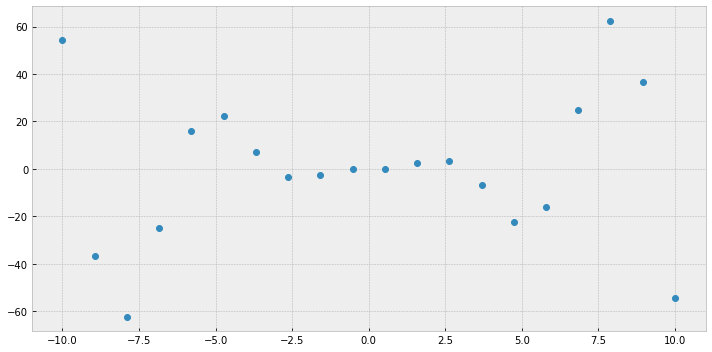

In [12]:
x = np.linspace(-10, 10, 20)
y = (x**2) * np.sin(x)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, marker='o', linestyle='')
plt.tight_layout()
plt.show()

In [13]:
from scipy.interpolate import interp1d

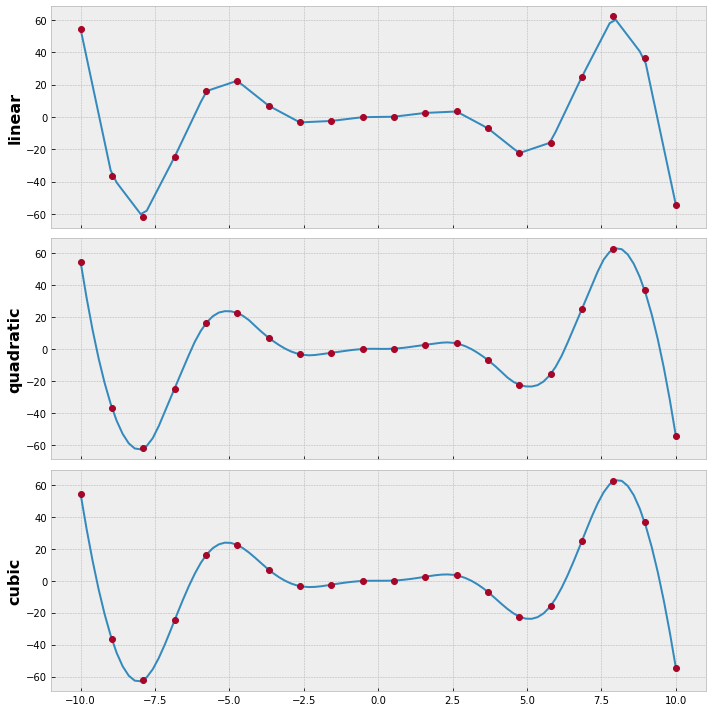

In [14]:
xs = np.linspace(-10, 10, 100)
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharex=True)

for i, kind in enumerate(['linear', 'quadratic', 'cubic']):
    f = interp1d(x, y, kind=kind)
    ys = f(xs)
    ax[i].plot(xs, ys)
    ax[i].plot(x, y, marker='o', linestyle='')
    ax[i].set_ylabel(kind, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Curve fitting

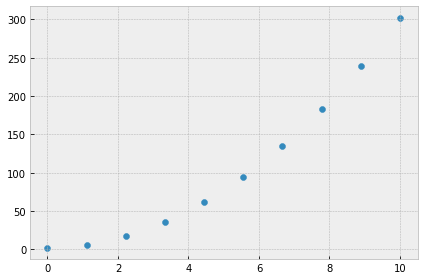

In [15]:
x_data = np.linspace(0, 10, 10)
y_data = 3*(x_data**2) + 2

plt.scatter(x_data, y_data)
plt.tight_layout()
plt.show()

$$y = ax^2 + b$$

In [16]:
from scipy.optimize import curve_fit

In [17]:
def func(x, a, b):
    return a*(x**2) + b

In [18]:
p_opt, p_cov = curve_fit(func, x_data, y_data, (0,0))

In [19]:
p_opt

array([3., 2.])

In [20]:
p_cov

array([[ 5.60783363e-35, -1.97312665e-33],
       [-1.97312665e-33,  1.31054585e-31]])

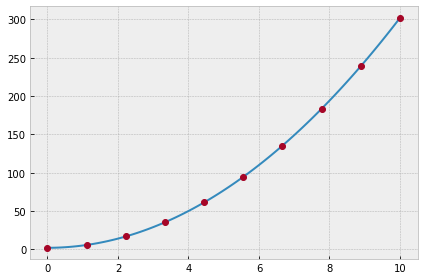

In [21]:
xs = np.linspace(0, 10, 100)
ys = func(xs, p_opt[0], p_opt[1])

plt.plot(xs, ys)
plt.plot(x_data, y_data, marker='o', linestyle='')
plt.tight_layout()
plt.show()

$$y(t) = A\cos(\omega t + \phi)$$

In [22]:
x_data = np.array([ 
    0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
    1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
    3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
    5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
    6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
    8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        
])
y_data = np.array([ 
    4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
    2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
    -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
    -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
    -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
    2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548
])

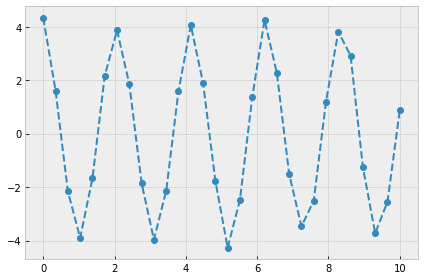

In [23]:
plt.plot(x_data, y_data, marker='o', linestyle='--')
plt.tight_layout()
plt.show()

In [24]:
def func(x, A, w, phi):
    return A * np.cos(w*x + phi)

In [25]:
p_opt, p_cov = curve_fit(func, x_data, y_data, p0=(1,1,1))

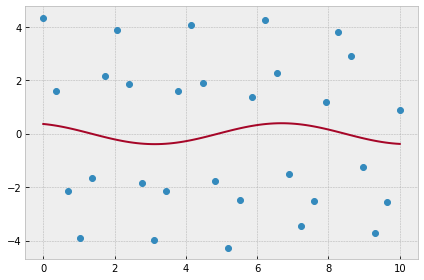

In [26]:
# initital guess is important

xs = np.linspace(0, 10, 100)
A, w, phi = p_opt
ys = func(xs, A, w, phi)

plt.plot(x_data, y_data, marker='o', linestyle='')
plt.plot(xs, ys)
plt.tight_layout()
plt.show()

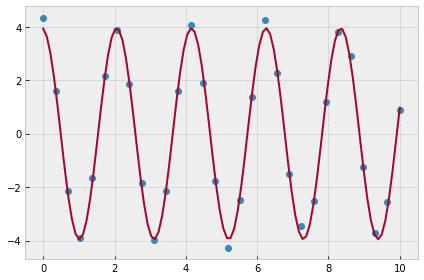

In [27]:
# try with better initial guess

p_opt, p_cov = curve_fit(func, x_data, y_data, p0=(2,3,1))

xs = np.linspace(0, 10, 100)
A, w, phi = p_opt
ys = func(xs, A, w, phi)

plt.plot(x_data, y_data, marker='o', linestyle='')
plt.plot(xs, ys)
plt.tight_layout()
plt.show()

# Calculus

## Differentiate

In [28]:
from scipy.misc import derivative

In [29]:
def f(x):
    return (x**3) + (x**2)

In [30]:
xs = np.linspace(-10, 10 ,100)
ys = f(xs)
diff_1 = derivative(f, xs, dx=1e-6, n=1) # first order derivative
diff_2 = derivative(f, xs, dx=1e-6, n=2) # second order derivative

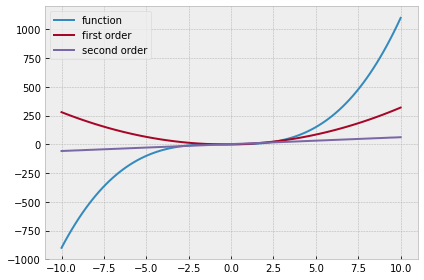

In [31]:
plt.plot(xs ,ys, label='function')
plt.plot(xs, diff_1, label='first order')
plt.plot(xs, diff_2, label='second order')

plt.legend()
plt.tight_layout()
plt.show()

## Integration

$$\int_{0}^{1} x^2 \sin(2x) e^{-x} dx$$

In [32]:
from scipy.integrate import quad # one integral

In [33]:
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
quad(integrand, 0, 1)

(0.14558175869954834, 1.6162822047366225e-15)

$$\int_{0}^{1} \int_{-x}^{x^2} \sin(x + y^2) dydx$$

In [34]:
from scipy.integrate import dblquad # double integral

In [35]:
integrand = lambda x, y: np.sin(x + y**2)
dblquad(integrand,
        0, 1,
        lambda x: -x, lambda x: x**2)

(0.315802507240474, 1.5634600713498928e-14)

# Differential Equations

In [36]:
from scipy.integrate import odeint

## First Order ODEs

$$ v^{'} - \alpha v^2 + \beta = 0 \quad v(0)=0$$

In [37]:
def dvdt(v, t):
    return 3*(v**2) - 5

v0 = 0

In [38]:
t = np.linspace(0, 1, 100)
sols = odeint(dvdt, v0, t)

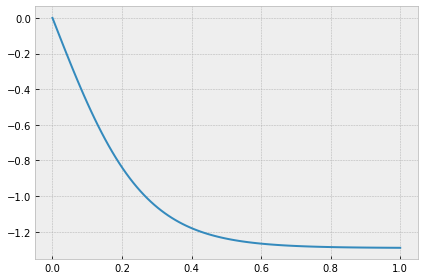

In [39]:
plt.plot(t, sols)
plt.tight_layout()
plt.show()

## Coupled first order ODEs

$$ y_{1}^{'} = y_1 + y_2^2 + 3x \quad y_1(0) = 0 $$
$$ y_{2}^{'} = 3y_1 + y_2^3 - cos(x) \quad y_2(0) = 0 $$

Let $S = (y_1, y_2)$ <br>
Define function that returns $\frac{dS}{dx} = (\frac{dy_1}{dx}, \frac{dy_2}{dx})$

In [40]:
def dSdx(S, x):
    y1, y2 = S
    y1_diff = y1 + y2**2 + 3*x
    y2_diff = 3*y1 + y2**3 - np.cos(x)
    
    return (y1_diff, y2_diff)

S0 = (0, 0)

In [41]:
xs = np.linspace(0, 1, 100)
sols = odeint(dSdx, S0, xs)

In [42]:
sols.shape

(100, 2)

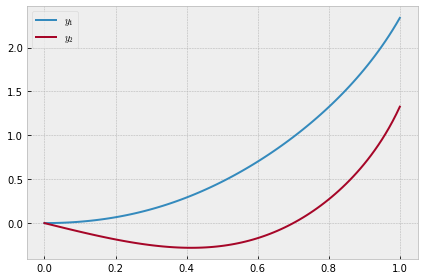

In [43]:
plt.plot(xs, sols[:,0], label=r'$y_1$')
plt.plot(xs, sols[:,1], label=r'$y_2$')
plt.legend()
plt.tight_layout()
plt.show()